<a href="https://colab.research.google.com/github/QwertyJacob/colab_handouts_PSI/blob/main/3.3.5_Poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3.3.5 La distribuzione di Poisson


La prossima distribuzione è legata al concetto di **eventi rari**, o **eventi poissoniani**. In sostanza, ciò significa che è estremamente improbabile che due tali eventi si verifichino simultaneamente o in un breve intervallo di tempo. Arrivi di lavori, chiamate telefoniche, messaggi e-mail, incidenti stradali, interruzioni di rete, attacchi di virus, errori in software, inondazioni e terremoti sono esempi di eventi rari. 

La **distribuzione di Poisson** è utilizzata per modellare eventi che si verificano in modo **raro** in un determinato intervallo di tempo o spazio. Questo concetto di "rarità" è legato alla sua applicazione pratica e alla natura delle situazioni in cui viene impiegata.

**Perché si parla di eventi "rari"?**

1. **Definizione della distribuzione**: La distribuzione di Poisson è tipicamente utilizzata quando il numero di eventi che si verificano è relativamente basso rispetto all'intervallo considerato. Ad esempio, eventi come il numero di chiamate ricevute in un call center in un'ora o il numero di incidenti stradali in una settimana sono esempi classici.

2. **Parametri della distribuzione**: La distribuzione è caratterizzata da un solo parametro, $ \lambda $ (lambda), che rappresenta il **tasso medio di occorrenza degli eventi**. Quando $ \lambda $ è piccolo, la probabilità di osservare più di un certo numero di eventi diminuisce e viceversa.

3. **Provenienza dalla binomiale**: La distribuzione di Poisson può essere derivata da una distribuzione binomiale quando il numero di prove $ n $ è molto grande e la probabilità di successo $ p $ è molto piccola, con la condizione che $ np $ rimanga costante al crescere di $n$. Questo contesto porta a situazioni in cui gli eventi sono _rari_ rispetto al totale delle prove.

**Eventi potenzialmente infiniti**

Sebbene gli eventi possano essere potenzialmente infiniti (poiché la variabile casuale può assumere valori interi non negativi da 0 a infinito), la probabilità associata a valori molto elevati diminuisce rapidamente. Questo significa che, mentre teoricamente ci possono essere infiniti eventi, nella pratica, ci si aspetta che il numero effettivo di eventi osservati rimanga basso rispetto all'intervallo totale considerato.


> **DEFINIZIONE 3.14**  Il numero di eventi rari che si verificano in un intervallo di tempo fisso ha **distribuzione di Poisson.**

Questa distribuzione prende il nome dal famoso matematico francese Siméon-Denis Poisson (1781–1840).

**Distribuzione di Poisson**  
$ \lambda $ = frequenza, numero medio di eventi  
$$ P(x) = \frac{\lambda^x}{x!} e^{-\lambda}, \quad x = 0, 1, 2, \ldots $$
$$ E(X) = \lambda $$
$$ Var(X) = \lambda $$


dove:
- $ x $ è il numero specifico di eventi,
- $ \lambda $ è il tasso medio degli eventi,
- $ e $ è la base dei logaritmi naturali.


Questa formula mostra chiaramente come la probabilità diminuisca per valori elevati di $ x $ quando $ \lambda $ è relativamente basso. Pertanto, la PMF evidenzia la rarità degli eventi: man mano che ci si allontana dal valore medio $ \lambda $, la probabilità associata a valori estremi diventa sempre più piccola.

In sintesi, la distribuzione di Poisson è utilizzata per eventi rari perché essa modella situazioni in cui le occorrenze sono sporadiche e il numero atteso di tali occorrenze rimane relativamente basso rispetto all'intervallo osservato.

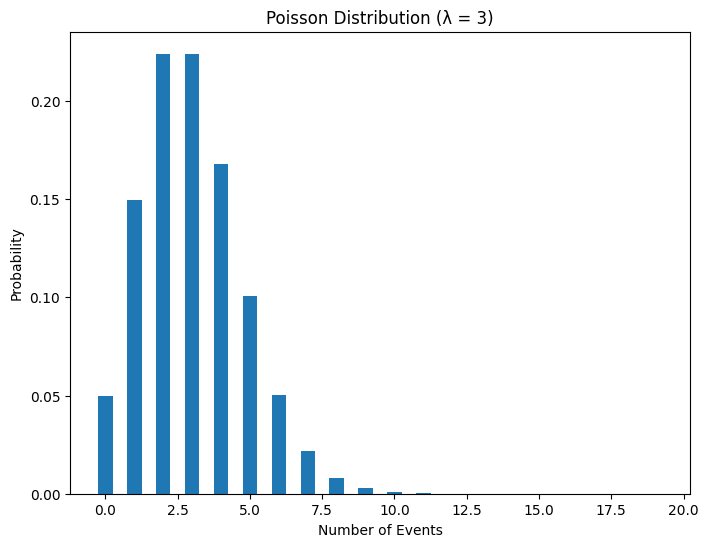

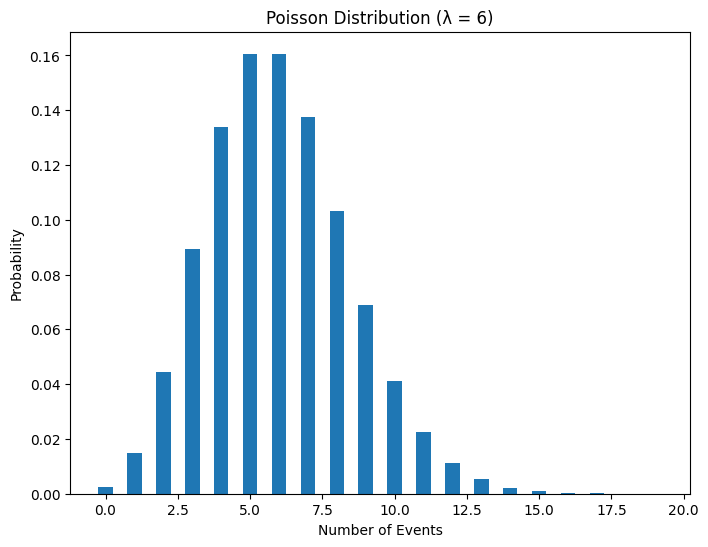

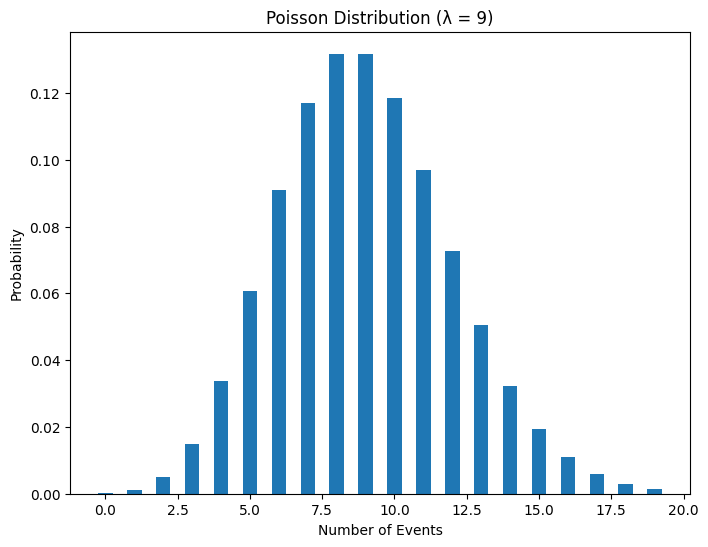

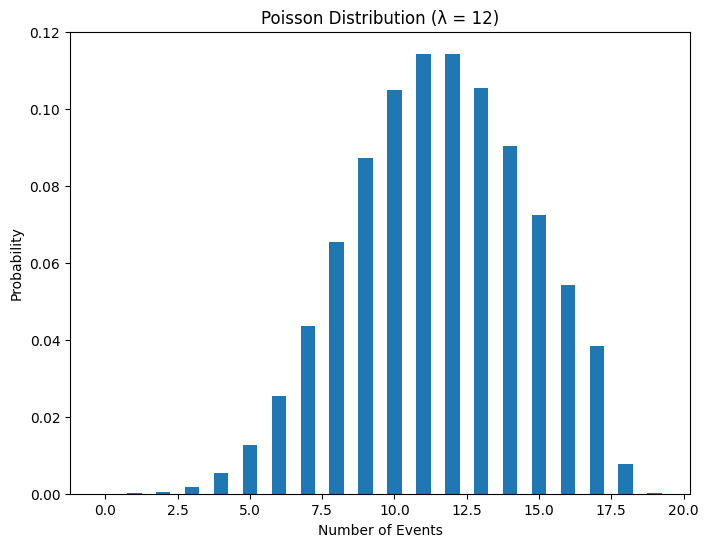

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
import math

def plot_poisson(lambd):
  """Plots the Poisson distribution for a given lambda."""

  x = np.arange(0, 20)
  y = np.exp(-lambd) * np.power(lambd, x) / np.array([math.factorial(i) for i in x])
  plt.figure(figsize=(8, 6))
  plt.bar(x, y, width=0.5)
  plt.title(f"Poisson Distribution (λ = {lambd})")
  plt.xlabel("Number of Events")
  plt.ylabel("Probability")
  plt.show()

plot_poisson(lambd=3)
plot_poisson(lambd=6)
plot_poisson(lambd=9)
plot_poisson(lambd=12)



La derivazione della **distribuzione di Poisson** dalla **distribuzione binomiale** avviene attraverso un processo di limite, in cui il numero di prove $ n $ tende all'infinito e la probabilità di successo $ p $ tende a zero.

Ora, l'unico parametro della v.a. di Poisson è il valore atteso $\lambda$, che nella v.a. Binomiale corrisponde al prodotto $ \lambda = n \cdot p $.

Se quindi ricaviamo $p$ dall'espressione precedente, otteniamo che potremmo esprimere la probabilità di successo - o di occorrenza dell'evento- con il rapporto $\frac{\lambda}{n}$.

Ora vediamo come si ottiene la PMF di Poisson partendo da una Binomiale dove la probabilità di successo è proprio $\frac{\lambda}{n}$. Seguiamo i passaggi dettagliati:

Iniziamo con la probabilità che una variabile binomiale $X \sim \text{Bin}(n,\frac{\lambda}{n})$ assuma il valore k:

$$ p(X=k) =  \binom{n}{k} (\frac{\lambda}{n})^k (1-\frac{\lambda}{n})^{n-k} $$

1) Primo passaggio: usiamo la defizionde di coefficiente binomiale $\binom{n}{k}$ e anche le proprietà degli esponenti:

$$ = \frac{n!}{k!(n-k)!} \cdot \frac{\lambda^k}{n^k} (1-\frac{\lambda}{n})^n (1-\frac{\lambda}{n})^{-k} $$

2) Secondo passaggio: raccogliamo $\frac{\lambda^k}{k!}$:
$$ = \frac{\lambda^k}{k!} \cdot \frac{n!}{(n-k)!n^k} (1-\frac{\lambda}{n})^n (1-\frac{\lambda}{n})^{-k} $$

3) Terzo passaggio: espandiamo $\frac{n!}{(n-k)!n^k}$:
$$ = \frac{\lambda^k}{k!} \cdot \frac{n(n-1)\cdots(n-k+1)}{n^k} (1-\frac{\lambda}{n})^n (1-\frac{\lambda}{n})^{-k} $$

Ora analizziamo i tre limiti fondamentali per $n \to \infty$:

a) Il primo limite:
$$ \frac{n(n-1)\cdots(n-k+1)}{n^k} \sim \frac{n^k}{n^k} \to 1 $$
Questo accade perché per n molto grande, i termini sottratti (1, 2, ..., k-1) diventano trascurabili rispetto a n.

b) Il secondo limite:
$$ (1-\frac{\lambda}{n})^n \to e^{-\lambda} $$
Questo è un limite notevole, che si può vedere come caso particolare di $(1+\frac{\alpha}{n})^n \to e^\alpha$ con $\alpha = -\lambda$

c) Il terzo limite:
$$ (1-\frac{\lambda}{n})^{-k} \to 1^{-k} = 1 $$
Questo perché $\frac{\lambda}{n}$ diventa trascurabile per n grande.

Quindi, mettendo tutto insieme:

$$ p(k) = \frac{\lambda^k}{k!} \cdot \underbrace{\frac{n(n-1)\cdots(n-k+1)}{n^k}}_{\to1} \underbrace{(1-\frac{\lambda}{n})^n}_{\to e^{-\lambda}} \underbrace{(1-\frac{\lambda}{n})^{-k}}_{\to 1} \to \frac{\lambda^k}{k!}e^{-\lambda} $$

Il risultato finale $\frac{\lambda^k}{k!}e^{-\lambda}$ è la funzione di massa di probabilità della distribuzione di Poisson di parametro $\lambda$.

Riccorda, questa approssimazione è particolarmente utile quando:

1) n è molto grande (numero di prove)

2) $\frac{\lambda}{n}$ è molto piccolo (probabilità di successo)

3) Il loro prodotto $\lambda$ rimane costante

**Derivazione media e varianza:** La funzione di massa di probabilità soddisfa $ \sum_{x=0}^{\infty} P(x) = 1 $, poiché la serie di Taylor per $ f(\lambda) = e^{\lambda} $ centrata in $ \lambda = 0 $ è

$$
e^{\lambda} = \sum_{x=0}^{\infty} \frac{\lambda^x}{x!},
$$

e questa serie converge per ogni $ \lambda $. Di conseguenza,

$$
\sum_{x=0}^{\infty} P(x) = \sum_{x=0}^{\infty} \frac{\lambda^x}{x!} e^{-\lambda} = e^{-\lambda} \cdot e^{\lambda} = 1.
$$

Il valore atteso $ E(X) $ può essere derivato dalla (3.13) come segue:

$$
E(X) = \sum_{x=0}^{\infty} x \cdot \frac{\lambda^x}{x!} e^{-\lambda} = 0 + \sum_{x=1}^{\infty} x \cdot \frac{\lambda^x}{x!} e^{-\lambda} = e^{-\lambda} \sum_{x=1}^{\infty} \frac{\lambda^x}{(x-1)!}
= e^{-\lambda} \cdot \lambda \sum_{x=1}^{\infty} \frac{\lambda^{x-1}}{(x-1)!} = e^{-\lambda} \cdot \lambda \cdot e^{\lambda} = \lambda.
$$

Analogamente, calcoliamo:

$$
E(X^2) - E(X) = \sum_{x=0}^{\infty} (x^2 - x) P(x) = \sum_{x=2}^{\infty} x(x-1) e^{-\lambda} \frac{\lambda^x}{x!}
= e^{-\lambda} \sum_{x=2}^{\infty} \frac{\lambda^x}{(x-2)!} = e^{-\lambda} \cdot \lambda^2 \sum_{x=2}^{\infty} \frac{\lambda^{x-2}}{(x-2)!} = e^{-\lambda} \cdot \lambda^2 \cdot e^{\lambda} = \lambda^2.
$$

Pertanto,

$$
E(X^2) = \lambda^2 + E(X) = \lambda^2 + \lambda,
$$

e la varianza risulta:

$$
Var(X) = E(X^2) - E^2(X) = (\lambda^2 + \lambda) - \lambda^2 = \lambda.
$$

$$\square$$

Una variabile di Poisson può assumere qualsiasi valore intero non negativo, poiché in un dato intervallo di tempo potrebbero non verificarsi eventi rari (esito zero), ma non esiste un limite superiore al numero di eventi che possono verificarsi. La distribuzione di Poisson ha un solo parametro, $ \lambda > 0 $, che rappresenta il numero medio di eventi rari considerati.


**Esempio 3.22 (Nuovi account).** I clienti di un provider di servizi internet aprono nuovi account a un tasso medio di 10 account al giorno.

(a) Qual è la probabilità che oggi vengano aperti più di 8 nuovi account?  
(b) Qual è la probabilità che in 2 giorni vengano aperti più di 16 nuovi account?

**Soluzione.** 
Perché possiamo utilizzare qui la v.a. di Poisson? Domandiamoci se l'apertura di un account in un certo istante influenza l'apertura di un altro account nell'istante successivo. O se esiste un limite massimo al numero di account che si possono aprire in un determinato intervallo di tempo. 

Anche se, in linea di principio e a rigore, la risposta alle due domande precedenti potrebbe essere "sì", il senso comune ci dice di assumere di no: dato che gli utente possibili del servizio sono moltissimi, possiamo assumere che l'apertura di due account siano eventi indipendenti nel tempo, e che in un intervallo di tempo qualsiasi, per esempio 5 minuti, possano avvenire illimitate aperture. 

Quindi il senso comune ci dice di fare due approssimazioni in questo caso:
- gli utenti che possono aprire il servizio sono infiniti.
- il numero di "istanti" in un qualsiasi intervallo di tempo è infinito.

Queste sono il tipo di approssimazioni su cui si appoggia la distribuzione di Poisson. Notiamo che la seconda è importante non solo perché possibilita illimitati eventi in un intevallo, ma perché, dato che la v.a. di Poisson viene dalla Binomiale, non può succedere che in uno stesso "istante" -comunque esso venga definito- avvengano due eventi di successo -in questo caso aperture di account- contemporaneamente. Questa è anche un'approssimazione! Nella realtà infatti, potrebbe darsi che in uno stesso istante avvengano due aperture, e questo lo andiamo a gestire -matematicamente- dividendo l'istante in due, cosa che si può sempre fare proprio grazie alla seconda delle appossimazioni elencate prima!

Torniamo alla soluzione dell'esercizio. Con le considerazioni fatte in precedenza possiamo quindi utilizzare la v.a. di Poisson per modellare il numero di nuovi account aperti oggi.

(a) Il numero $ X $ di nuovi account aperti oggi ha distribuzione di Poisson con parametro $ \lambda = 10 $.

$$
P(X > 8) = 1 - \sum_{k=0}^8 \frac{e^{-10}\,10^k }{k!} = 1 - 0{,}333 = 0{,}667.
$$

(b) Il numero di account aperti in 2 giorni, indicato con $ Y $, non è uguale a $ 2X $. Piuttosto, $ Y $ è un’altra variabile aleatoria di Poisson il cui parametro è $ 2 \cdot 10 = 20 $. Infatti, il parametro $ \lambda $ rappresenta il numero medio di eventi rari, che raddoppia su un periodo di due giorni.

$$
P(Y > 16) = 1 - \sum_{k=0}^16 \frac{e^{-20}\,20^k }{k!}  = 1 - 0{,}221 = 0{,}779.
$$

♦


### 3.3.6 **Approssimazione poissoniana della distribuzione binomiale**

> Le approssimazioni fatte in precedenza sembrano forti vero? Ora vediamo perché, dal punto di vista empirico, non lo sono: Abbiamo visto che la distribuzione di Poisson è il risultato di far tendere all'infinito il numero di esperimenti bernoulliani che compone una binomiale con una probabilità di successo molto piccola. Empiricamente risulta che $n$ non deve proprio tendere ad infinito affinché la distribuzione di Poisson infatti possa essere utilizzata efficacemente per approssimare le probabilità binomiali: **Tale approssimazione è adeguata, ad esempio, quando $ n \geq 30 $ e $ p \leq 0{,}1 $, e diventa più accurata all’aumentare di $ n $.**



> **Esempio 3.23 (Nuovi account, continuazione).**  In effetti, l'esercizio nell’Esempio 3.22 poteva essere modellato come una sequenza di prove di Bernoulli. Avremmo potuto stabilire che nell’area comerciale dell'azienda ci siano $ n = 400 $ utenti internet potenziali e che, in un determinato giorno, ciascuno di essi apra un nuovo account con probabilità $ p = 0{,}025 $. in questo caso avremo comunque potuto rispondere a domande sulla probabilità del numero di nuovi account aperti in un giorno usando una v.a. di Poisson con valore atteso $ E(X) = np = 10 $.
♦


**Approssimazione poissoniana**  
alla distribuzione binomiale  
$$ 
    \text{Binomiale}(n, p) \approx \text{Poisson}(\lambda) \tag{3.14}
$$
dove $ n \geq 30 $, $ p \leq 0{,}1 $, e $ np = \lambda $  




> **Osservazione**: Quando $ p $ è grande ($ p \geq 0{,}95 $), l’approssimazione poissoniana è comunque applicabile. In questo caso, la probabilità di insuccesso $ q = 1 - p $ è piccola. Allora si può approssimare il numero di insuccessi — anch’esso distribuito binomialmente — con una distribuzione di Poisson.

> **Esempio 3.24.** Il 97% dei messaggi elettronici viene trasmesso senza errori. Qual è la probabilità che su 200 messaggi, almeno 195 vengano trasmessi correttamente?

**Soluzione.** Sia $ X $ il numero di messaggi trasmessi correttamente. È il numero di successi in 200 prove di Bernoulli, quindi $ X $ ha distribuzione binomiale con $ n = 200 $ e $ p = 0{,}97 $. L’approssimazione poissoniana non può essere applicata direttamente a $ X $ perché $ p $ è troppo elevato. Tuttavia, il numero di insuccessi $ Y $ (messaggi con errori) è anch’esso binomiale, con parametri $ n = 200 $ e $ q = 0{,}03 $, ed è approssimabile con una distribuzione di Poisson di parametro $ \lambda = nq = 6 $. Quindi possiamo risolvere l'esercizio così:

$$
P(X \geq 195) = P(Y \leq 5) = \sum_{k=0}^5 \frac{e^{-6}\,6^k }{k!} \approx 0{,}446.
$$

♦


Esiste una grande varietà di applicazioni che coinvolgono un elevato numero di prove con bassa probabilità di successo. Se le prove non sono indipendenti, in generale il numero di successi non è distribuito binomialmente. Tuttavia, se la dipendenza è debole, l’uso dell’approssimazione poissoniana in tali contesti può comunque produrre risultati sorprendentemente accurati.

> **Esempio 3.25 (Paradosso del compleanno).**  
Si consideri una classe con $ N \geq 10 $ studenti. Calcolare la probabilità che almeno due di loro siano nati nello stesso giorno. Quanti studenti devono essere presenti in classe affinché questa probabilità sia superiore a $ 0{,}5 $?

**Soluzione.** Si utilizza l’approssimazione poissoniana al numero di coppie di studenti con lo stesso compleanno, tra tutte le

$$
n = \binom{N}{2} = \frac{N(N - 1)}{2}
$$

coppie possibili nella classe. Per ogni coppia, la probabilità che entrambi gli studenti siano nati nello stesso giorno è $ p = 1/365 $. Ogni coppia rappresenta una prova di Bernoulli, poiché i due compleanni o coincidono o non coincidono. Inoltre, gli eventi “coincidenza nei compleanni” in due coppie diverse sono “quasi” indipendenti. Pertanto, la variabile $ X $, numero di coppie con compleanno in comune, è “quasi” binomiale.

Per $ N \geq 10 $, si ha $ n \geq 45 $, valore sufficientemente grande, e $ p $ è piccolo. Possiamo quindi applicare l’approssimazione poissoniana con parametro

$$
\lambda = np = \frac{N(N - 1)}{2} \cdot \frac{1}{365} = \frac{N(N - 1)}{730}.
$$

Allora:

$$
P(\text{almeno due studenti con lo stesso compleanno}) = 1 - P(\text{nessuna coincidenza})
= 1 - P(X = 0) \approx 1 - e^{-\lambda} \approx 1 - e^{-N(N - 1)/730}.
$$

Per semplificare, approssimiamo ulteriormente $ N(N - 1) \approx N^2 $, ottenendo:

$$
P \approx 1 - e^{-N^2 / 730}.
$$

Risolviamo la disequazione:

$$
1 - e^{-N^2 / 730} > 0{,}5
\quad \Rightarrow \quad
e^{-N^2 / 730} < 0{,}5
\quad \Rightarrow \quad
-N^2 / 730 < \ln(0{,}5)
\quad \Rightarrow \quad
N^2 > 730 \ln 2
\quad \Rightarrow \quad
N > \sqrt{730 \ln 2} \approx \sqrt{730 \cdot 0{,}6931} \approx \sqrt{506} \approx 22{,}5.
$$

Pertanto, in una classe di almeno $ N = 23 $ studenti, c’è più del 50% di probabilità che almeno due di loro siano nati nello stesso giorno dell’anno!

♦


In [13]:
create_one_outcome()

('Apr 28', 'Nov 2')


Il metodo introdotto può essere applicato soltanto quando $ p $ è molto piccolo o molto grande. Per valori moderati di $ p $ (con $ 0{,}1 \leq p \leq 0{,}9 $), l’approssimazione poissoniana potrebbe non essere accurata. Tali casi sono trattati invece dal **Teorema del Limite Centrale**, che vedremo più avanti.

Approfondimenti:
- https://probabilityforcs.firebaseapp.com/book/birthday_paradox
- https://adrianogilardone.com/distribuzione-di-poisson/
- https://fastercapital.com/it/contenuto/Funzione-di-massa-di-probabilit%C3%A0--appello-di-massa--il-ruolo-della-funzione-di-massa-di-probabilit%C3%A0-in-Poisson.html
- https://www.webtutordimatematica.it/materie/statistica-e-probabilita/distribuzioni-di-probabilita-discrete/distribuzione-di-poisson
- https://elearning.uniparthenope.it/pluginfile.php/146733/mod_folder/content/0/Metodi/8.%20v.c.%20Discrete_Binomiale%20e%20Poisson.pdf?forcedownload=1
- https://it.wikipedia.org/wiki/Distribuzione_di_Poisson
-  https://appunti.cavallium.it/